In [9]:
### ignore this block  ''' This handles the markdown page'''

from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

# Starts here:

WORK STILL IN PROGRESS


------------------------------------------------------------------------------------------------------------
reading data and preliminary analysis

#### Main Issues: 

Lack of sufficient data

#### Issues that can be worked on:

categorical variables can be used in modelling for predicting the prices. As you progress you will it will shown how the make of the car can be incorporated into the model and why it is an important feature.

##


In [20]:
import numpy as np
import math
import pandas as pd
pd.set_option('display.max_columns', 26)
import warnings
warnings.filterwarnings('ignore')


def read_data():
    columnNames = ["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style",
                   "drive_wheels","engine_location","wheel_base","length","width","height","curb_weight",
                   "engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke",
                   "compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

    carsData = pd.read_table("./imports-85.data", names=columnNames, delimiter=",", index_col=False)
    carsData = carsData.convert_objects(convert_numeric=True)
    return carsData

carsData = read_data()
print carsData.describe()
# carsData.to_csv("./cars.csv")

        symboling  normalized_losses  wheel_base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb_weight  engine_size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539    0.316717   
min     47.800000  1488.000000 

  |s.no |Attribute Name             | Attribute description |  my opinion on features                   |
  |:-----:|-------------------------|:----------------------|:----------------------------------------:|
  |1. |symboling:              | -3, -2, -1, 0, 1, 2, 3.   | currently not using |
  |2. |normalized-losses:      | continuous from 65 to 256.| estimated missing values based on make but not using this due low correlation to prices|
  |3. |make:                   |  alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
  |4. |fuel-type:              | diesel, gas. | highly skewed hence ignoring|
  |5. |aspiration:             | std, turbo. | to experiment |
  |6. |num-of-doors:           |  four, two.  |
  |7. |body-style:             |  hardtop, wagon, sedan, hatchback, convertible.
  |8. |drive-wheels:           |  4wd, fwd, rwd.
  |9. |engine-location:        |  front, rear.
 |10. |wheel-base:             |  continuous from 86.6 120.9.
 |11. |length:                 |  continuous from 141.1 to 208.1.
 |12. |width:                  |  continuous from 60.3 to 72.3.
 |13. |height:                 |  continuous from 47.8 to 59.8.
 |14. |curb-weight:            |  continuous from 1488 to 4066.
 |15. |engine-type:            |  dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 |16. |num-of-cylinders:       |  eight, five, four, six, three, twelve, two.
 |17. |engine-size:            |  continuous from 61 to 326.
 |18. |fuel-system:            |  1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 |19. |bore:                   |  continuous from 2.54 to 3.94.
 |20. |stroke:                 |  continuous from 2.07 to 4.17.
 |21. |compression-ratio:      |  continuous from 7 to 23.
 |22. |horsepower:             |  continuous from 48 to 288.
 |23. |peak-rpm:               |  continuous from 4150 to 6600.
 |24. |city-mpg:               | continuous from 13 to 49.
 |25. |highway-mpg:            | continuous from 16 to 54.
 |26. |price:                  | continuous from 5118 to 45400.

make


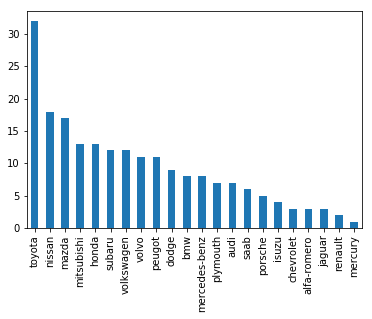

fuel_type


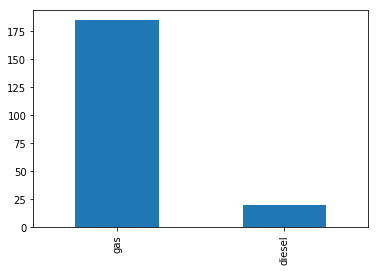

aspiration


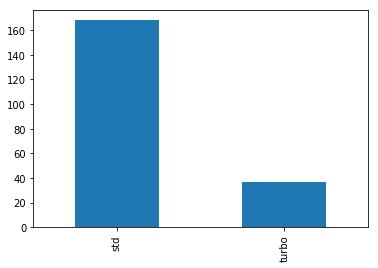

num_of_doors


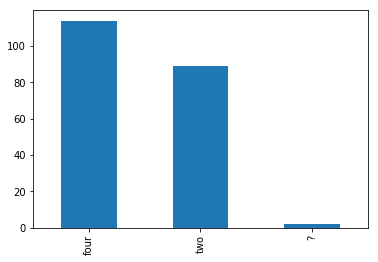

body_style


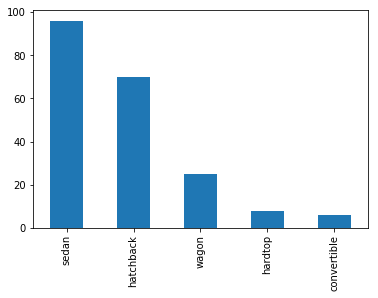

drive_wheels


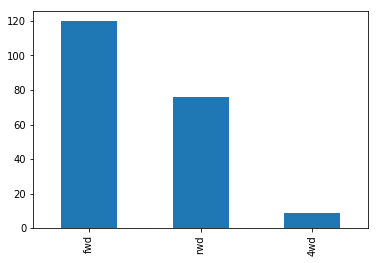

engine_location


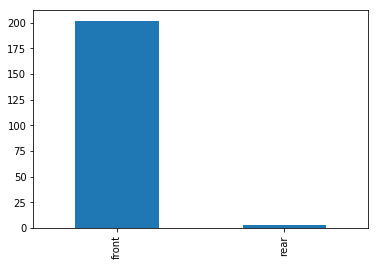

engine_type


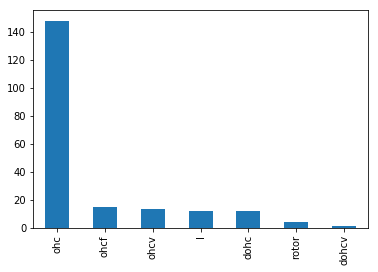

num_of_cylinders


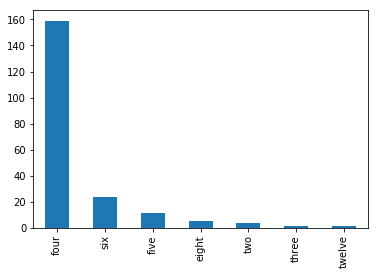

fuel_system


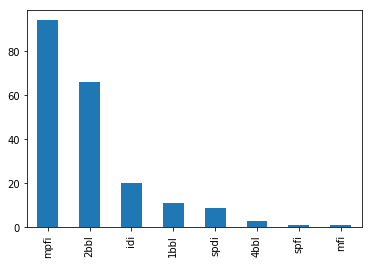

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()

for x in carsData.select_dtypes(exclude=['float64', 'int']):
    print x
    carsData[x].value_counts().plot(kind='bar')
    plt.show()

From above we can see that most of the times the categorical data is skewed and not equally distributed among all classes

Below function to fill missing values of column by taking dependence on another column to get the most 
appropriate values

#### Note: 
we can use nearest neighbours approach to get a better approximation but I will using the below method for this challenge

In [ ]:
def fill_missing(missingColVlaue, dependentColValue, missingColName, dependentColName):
    
    if not math.isnan(carsData.groupby([dependentColName]).mean()[missingColName][dependentColValue]) \
            and math.isnan(missingColVlaue):
        missingColVlaue = carsData.groupby([dependentColName]).mean()[missingColName][dependentColValue]
    elif math.isnan(carsData.groupby([dependentColName]).mean()[missingColName][dependentColValue]) \
            and math.isnan(missingColVlaue):
        missingColVlaue = carsData[missingColName].mean()
    return missingColVlaue


In [ ]:
# count and mean using group by to analyze normalized loss
pd.DataFrame({'mean_norm_loss': carsData.groupby('make').mean().normalized_losses,
             'count': carsData.groupby('make').size()}).reset_index()

### filling missing normalized loss with similar make values

from the above table it is clear that only 4 makes that are not having any values in the normalized 
losses column. From my observation cars of similar makes have almost the same normalized losses, so by using 
making use of this observation I am filling the missing values for the normalized losses in the data.

#### Note: 
I agree this is not the best thing to do, but for the purpose of this challenge I am proceeding this way as felt this might be need after looking into data and seeing the relationship between car maker and normalized loss


In [ ]:
carsData["normalized_losses"] = carsData.apply(lambda x: 
                                    fill_missing(x['normalized_losses'], x['make'],
                                                 "normalized_losses", "make"), axis=1)


In [ ]:
print carsData.isnull().any().sum()

now since 5 is pretty small number outoff 205 samples I am dropping these records for the purpose of this 
challenge

A basic model to see how Linear regression works on the entire
Coefficient of determination R^2 is used to check the model efficiency.

#### Note: 
below scoring metric used is mean absoulte error in cross_val_score function which returns a negative value

In [25]:
data = carsData.dropna()

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


X = data.select_dtypes(include=["float64","int"]).drop(["price"], axis=1)
print "features in model", X.columns
y = data.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()

features in model Index([u'symboling', u'normalized_losses', u'wheel_base', u'length', u'width',
       u'height', u'curb_weight', u'engine_size', u'bore', u'stroke',
       u'compression_ratio', u'horsepower', u'peak_rpm', u'city_mpg',
       u'highway_mpg'],
      dtype='object')
The means absoulte error:  2403.86994376 and its std:  249.460951343


##### Lazy model
The means absoulte error:  2403.86994376 and its std:  249.460951343

### using only continous features and dropping integer features

using general linear regression

In [28]:
X = data.select_dtypes(include=["float64"]).drop(["price"], axis=1)
y = data.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()
print X.columns

The means absoulte error:  2297.75907332 and its std:  231.908015867
R-squared value 0.656138515342
Index([u'normalized_losses', u'wheel_base', u'length', u'width', u'height',
       u'bore', u'stroke', u'compression_ratio', u'horsepower', u'peak_rpm'],
      dtype='object')


###### The model error has decreased after dropping integer colums
dropped columns: symboling, crub weight, engine_size, city mpg
###### Model has improved
The means absoulte error:  2297.75907332 and its std:  231.908015867

reduction in error = $106

#### Feature engineering to improve model

just trying to include some int feature which miight help improve model

In [41]:
X = data.select_dtypes(include=["float64",'int']).drop(
    ["price",'symboling','city_mpg' ,'engine_size','curb_weight'], axis=1)
y = data.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()
print X.columns

The means absoulte error:  2298.79144837 and its std:  244.234390485
R-squared value 0.663028199598
Index([u'normalized_losses', u'wheel_base', u'length', u'width', u'height',
       u'bore', u'stroke', u'compression_ratio', u'horsepower', u'peak_rpm',
       u'highway_mpg'],
      dtype='object')


###### The model error has decreased after dropping only symboling instead of all integer colums
dropped columns: crub weight, engine_size, city mpg
###### Model has improved
The means absoulte error:  2297.75907332 and its std:  231.908015867

reduction in error = $106

### Few visualizations I might need to refer frequently

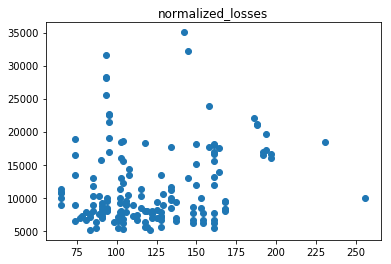

normalized_losses :  0.19992385279


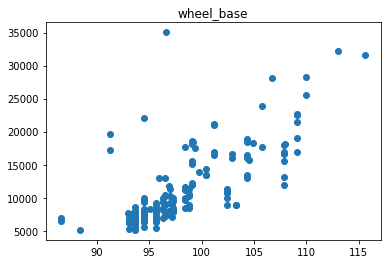

wheel_base :  0.73478879951


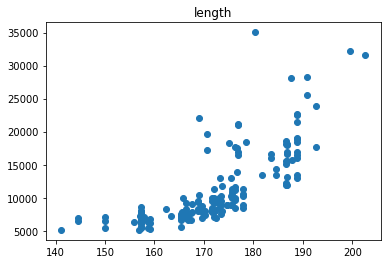

length :  0.760322753653


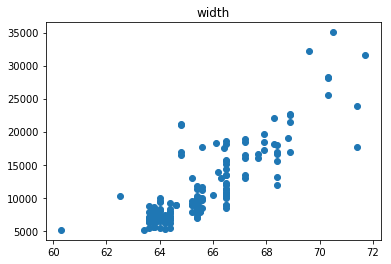

width :  0.843315699834


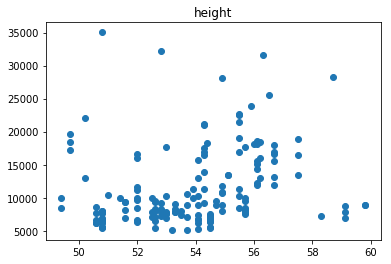

height :  0.247500235499


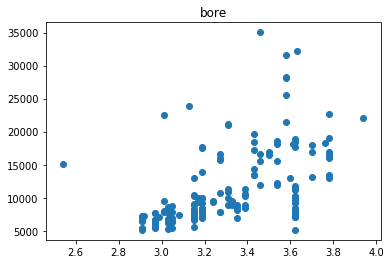

bore :  0.534890784875


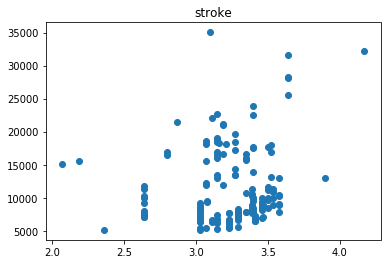

stroke :  0.158798228988


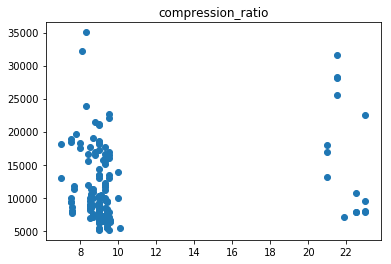

compression_ratio :  0.210948440905


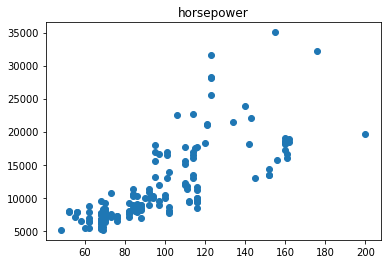

horsepower :  0.758582271814


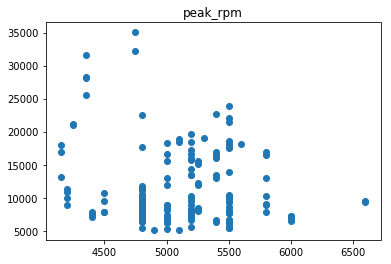

peak_rpm :  -0.173970056998


In [30]:
# feature generation based on plots against price for the continous variables
cor_aginst_price = {}
for feature in X.columns:
    fig = plt.figure()
    plt.title(feature)
    plt.scatter(X[feature], y)
    plt.show()
    cor_aginst_price[feature] = np.corrcoef(X[feature], y)[1,0]
    print feature,": ",np.corrcoef(X[feature], y)[1,0]
    

#### Note: 
even though we tried to estimate the normalized loss it not very useful in the naive model below because of the low correlation

# Preprocessing data

1. removing unwanted data
    unwanted feature 1: engine location reason: only around 2 cars have back engine --> less important feature

2. filling missing data

3. droping na's

4. One hot encoding using pandas get_dummies   [later it is noticed that this didn't work well and hence pruned]


In [ ]:
cars = read_data()

# filling missing values in normalized loss
cars[cars['make'] == 'renault'].normalized_losses = cars.normalized_losses.mean()
cars["normalized_losses"] = cars.apply(lambda 
                                       x:fill_missing(x['normalized_losses'], x['make'],
                                                      "normalized_losses", "make"), axis=1)

def convertor_str_to_num(x):
    convertor = {'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7, 'eight':8,
                'nine':9,'ten':10,'eleven':11,'twelve':12}
    return convertor[x]

def convertor_wheel_drive(x):
    convertor = {"rwd":3,"fwd":1,"4wd":2}
    return convertor[x]
    

cars.num_of_doors[cars.num_of_doors == "?"] = np.nan

# droping a few columns whose information can be compensated by other features in the data
# altering the features below will help me do feature engineering

cars.drop(["fuel_system","aspiration","engine_type", "engine_location","fuel_type", "make",
           "symboling","body_style"],
          axis=1, inplace=True)
cars.dropna(inplace=True)

cars.num_of_cylinders = cars.num_of_cylinders.apply(convertor_str_to_num)
cars.num_of_doors = cars.num_of_doors.apply(convertor_str_to_num)
cars.drive_wheels = cars.drive_wheels.apply(convertor_wheel_drive)

cars = pd.get_dummies(cars)

Now trying linear regression to predict prices

## Naive approach with little feature engineering
...

In [ ]:
X = cars[['horsepower','length', 'width', 'bore']]
y = cars[['price']]
clf = Lasso()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The negative means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()

The above approach is not bad, but can we still improve?

In [ ]:
print cars.price.describe()
fig = plt.figure()
plt.hist(cars.price, bins=70)
plt.show()

Out of all numerical features the most co-related are the below features corrleation ~ 0.7
1. length
2. width
3. horsepower "very important feature"

However brand is also an important feature but given that it is a categorial variable modelling it in a linear is quite a hard task

1. I have tried 1 hot encoding technique but I am presenting that here as it didn't prove to be better that my naive approach
2. Tried classifying and then running linear regression where I first classify the data into 1 of the 3 categories(high cost, medium cost and low cost) and then predict the price using linear regrssion. This failed. Reasons might many outliers in data, classification issues which inturn effected the linear regression. This model is presented at last.
3. 
###### My goal is to use categorical features and minimize the error

Why is this the right approach? lets look into a few box plots shown below


In [ ]:
cars = read_data()
cars["normalized_losses"] = cars.apply(lambda x:
                                       fill_missing(x['normalized_losses'], x['make'],
                                                 "normalized_losses", "make"), axis=1)
cars.dropna(inplace=True)

%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
fig = plt.figure()
cars.boxplot(column='price', by='make', rot=30, showfliers=False)
plt.show()

These plots might help in understanding into how may classes we need to classify before we run linear regression.

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
fig = plt.figure()
cars.boxplot(column='price', by='symboling', rot=30, showfliers=False)
plt.show()

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
fig = plt.figure()
cars.boxplot(column='price', by='body_style', rot=30, showfliers=False)
plt.show()

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
fig = plt.figure()
cars.boxplot(column='price', by='engine_type', rot=30, showfliers=False)
plt.show()

#### classifying into 3 categories and then running linear regression -- needs improvements

Breaking Down approch to use classification and then using linear regression
Putting in 3 models
1. high cost cars
2. moderate cost cars
3. low cost cars
I am using basic domain knowledge for this classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
clf = Ridge()
from sklearn.metrics import mean_absolute_error

def linear_regression(X,y):
    clf.fit(X,y)
    w = clf.coef_   # weights
    return w 

train, test = train_test_split(cars[['horsepower','length', 'width', 'bore','price','wheel_base']],
                               test_size=0.1, random_state=1)

hc_cars = train[train.price > 17000]
mc_cars = train[(train.price <= 17000) & (train.price > 10000)]
lc_cars = train[train.price <= 10000]

hc_X = hc_cars.drop(['price'], axis=1) ; hc_y = hc_cars.price
mc_X = mc_cars.drop(['price'], axis=1) ; mc_y = mc_cars.price
lc_X = lc_cars.drop(['price'], axis=1) ; lc_y = lc_cars.price

hc_w = linear_regression(hc_X, hc_y)
mc_w = linear_regression(mc_X, mc_y)
lc_w = linear_regression(lc_X, lc_y)

hc_X_mean = np.asarray(hc_X.mean()); mc_X_mean = np.asarray(mc_X.mean()); lc_X_mean = np.asarray(lc_X.mean())

test["price_prediction"] = pd.Series(np.zeros(len(test)),index=test.index)

def classfiy_and_estimate(x):
    x = np.asarray(x)
    diffs = [np.linalg.norm(x-hc_X_mean), np.linalg.norm(x-mc_X_mean), np.linalg.norm(x-lc_X_mean)]
    # select model based on least diffs
    if diffs.index(max(diffs)) == 2:
        w = lc_w
    elif diffs.index(max(diffs)) == 1:
        w = mc_w
    elif diffs.index(max(diffs)) == 0:
        w = hc_w
    price_prediction = np.dot(x,w)

    return price_prediction

test['price_prediction'] = test.iloc[:,:-2].apply(classfiy_and_estimate, axis=1)

mae = mean_absolute_error(test['price'],test['price_prediction'])

print mae